In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import time

# Third-Party Libraries
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from memory_profiler import memory_usage
from pymining import itemmining, assocrules
import pandas as pd
from itertools import combinations
from mlxtend.frequent_patterns import apriori, association_rules 
import numpy as np
import pandas as pd
from itertools import combinations

In [ ]:
import pandas as pd

# Read the data from the file
file_path = '/Users/srujana_chintala/Desktop/Data Mining/Project/Responses.txt'
df = pd.read_csv(file_path, delimiter='\t', header=None)

# Assign column names to the DataFrame
columns = [
    "ID", "Gender", "Age_Group", "Residence", "Education_Level", "Source_of_Income",
    "Marital_Status", "Smoked_Cigarettes", "Year_Diagnosed", "Surgical_Treatment",
    "Chemotherapy", "Radiotherapy", "Immunotherapy", "Molecular_targeted_Therapy",
    "Hospitalization_Number", "Time_to_Treatment", "Medical_Treatment_Need",
    "Emotional_Impact", "Travel_Impact", "Quality_of_Life", "Symptoms_exp_cough",
    "Symptoms_exp_Hoarseness", "Symptoms_exp_Blood_cough", "Symptoms_exp_chestpain",
    "Symptoms_exp_Shortness_of_breath", "Symptoms_exp_weakness", "Symptoms_exp_None",
    "Symptom_Frequency", "Symptom_Household_Impact", "Sleep_Issues", "Support_From_Close",
    "Dependency_Fear", "Health_Satisfaction", "Daily_Life_Impact_physical", "Daily_Life_Impact_Psychological",
    "Daily_Life_Impact_proffesional", "Daily_Life_Impact_family_life", "Daily_Life_Impact_social_life",
    "Daily_Life_Impact_no_effect", "Energy_Level", "Self_Care", "Daily_Activities_Difficulty",
    "Work_Readiness", "Support_Satisfaction", "Coping_Strategy", "Negative_Emotions"
]
df.columns = columns

# List of single-choice categorical variables to be one-hot encoded
single_choice_vars = [
    'Gender', 'Age_Group', 'Residence', 'Education_Level', 'Source_of_Income', 'Marital_Status',
    'Hospitalization_Number', 'Time_to_Treatment', 'Medical_Treatment_Need', 'Quality_of_Life',
    'Symptom_Frequency', 'Symptom_Household_Impact', 'Sleep_Issues', 'Dependency_Fear',
    'Energy_Level', 'Self_Care', 'Daily_Activities_Difficulty', 'Work_Readiness',
    'Support_Satisfaction', 'Coping_Strategy', 'Negative_Emotions'
]

# Mapping of variables to their options for meaningful labels
options_dict = {
    'Gender': {1: 'Female', 2: 'Male', 3: 'Nonbinary', 4: 'Prefer_not_to_say'},
    'Age_Group': {1: 'Below_30', 2: '30_45', 3: '46_60', 4: 'Above_60'},
    'Residence': {1: 'Village', 2: 'Town_upto_100k', 3: 'Town_100k_500k', 4: 'City_over_500k'},
    'Education_Level': {1: 'Primary', 2: 'Vocational', 3: 'Secondary', 4: 'Higher'},
    'Source_of_Income': {1: 'Employment', 2: 'Pension', 3: 'Retirement', 4: 'Other'},
    'Marital_Status': {1: 'Single', 2: 'Married', 3: 'Divorced', 4: 'Widowed'},
    'Hospitalization_Number': {1: 'Zero', 2: 'One_to_three', 3: 'Three_to_five', 4: 'Above_five'},
    'Time_to_Treatment': {1: 'Up_to_one_month', 2: 'One_to_three_months', 3: 'More_than_three_months'},
    'Medical_Treatment_Need': {1: 'Not_at_all', 2: 'Moderately', 3: 'Large_extent', 4: 'Very_large_extent'},
    'Quality_of_Life': {1: 'Very_good', 2: 'Good', 3: 'Bad', 4: 'Very_bad'},
    'Symptom_Frequency': {1: 'Did_not_occur', 2: 'Rather_rarely', 3: 'Most_of_time', 4: 'All_the_time'},
    'Symptom_Household_Impact': {1: 'Do_not_affect', 2: 'Rarely_affect', 3: 'Often_affect', 4: 'Always_affect'},
    'Sleep_Issues': {1: 'Not_once', 2: 'Rather_rarely', 3: 'Most_of_time', 4: 'All_the_time'},
    'Dependency_Fear': {1: 'Not_afraid', 2: 'Minimally', 3: 'Large_extent', 4: 'Very_large_extent'},
    'Energy_Level': {1: 'Fully', 2: 'Mostly', 3: 'Very_little', 4: 'Not_at_all'},
    'Self_Care': {1: 'No_problems', 2: 'Minor_problems', 3: 'Serious_problems', 4: 'Cannot_perform'},
    'Daily_Activities_Difficulty': {1: 'No_problems', 2: 'Minor_problems', 3: 'Moderate_problems', 4: 'Serious_problems', 5: 'Unable_to_perform'},
    'Work_Readiness': {1: 'Satisfied', 2: 'Moderately_satisfied', 3: 'Dissatisfied'},
    'Support_Satisfaction': {1: 'Satisfied', 2: 'Moderately_satisfied', 3: 'Dissatisfied'},
    'Coping_Strategy': {1: 'Well', 2: 'Hard_to_say', 3: 'Badly'},
    'Negative_Emotions': {1: 'Never', 2: 'Rarely', 3: 'Often', 4: 'All_the_time'}
}

# Map numerical codes to meaningful labels
for var in single_choice_vars:
    if var in options_dict:
        df[var] = df[var].map(options_dict[var])

# One-hot encode the single-choice categorical variables
df = pd.get_dummies(df, columns=single_choice_vars)

# Save the processed data to a different directory
output_file_path = '/Users/srujana_chintala/processed_new_survey_data_columns.csv'
df.to_csv(output_file_path, index=False)

# Display the first few rows of the processed DataFrame
print(df.head())


   ID  Smoked_Cigarettes  Year_Diagnosed  Surgical_Treatment  Chemotherapy  \
0   1                  1            2021                   0             1   
1   2                  1            2020                   1             1   
2   3                  1            2020                   1             0   
3   4                  1            2021                   1             1   
4   5                  1            2019                   1             1   

   Radiotherapy  Immunotherapy  Molecular_targeted_Therapy  Emotional_Impact  \
0             0              1                           0                 1   
1             0              0                           0                 1   
2             0              0                           0                 1   
3             0              0                           0                 1   
4             0              0                           0                 1   

   Travel_Impact  ...  Support_Satisfaction_Dissat

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Implement SVM model predict medical treatment based on the factors like bad quality of life, emotional impact and health satisfaction ? 

In [ ]:
# Specify the columns for features (X) and target (y)
feature_columns = ['Health_Satisfaction', 'Emotional_Impact', 'Quality_of_Life_Bad']
target_column = 'Medical_Treatment_Need_Large_extent'

# Extract the features (X) and target (y) from the DataFrame
X = df[feature_columns].values
y = df[target_column].values



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Make predictions on the testing data
y_pred = svm_model.predict(X_test)


# Create a DataFrame for the test data
test_data = pd.DataFrame(X_test, columns=feature_columns)
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred

# Print the DataFrame
print(test_data)


   Health_Satisfaction Emotional_Impact Quality_of_Life_Bad  Actual  Predicted
0                    1                1                True    True       True
1                    1                1               False   False      False
2                    0                1               False   False      False
3                    1                1               False   False      False
4                    1                1                True    True       True
5                    1                1                True    True       True
6                    1                1               False   False      False
7                    1                1                True    True       True
8                    0                1                True   False       True
9                    1                1               False   False      False
10                   1                1                True    True       True
11                   1                1             

In [ ]:
#Model evaluation

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.83      0.88        41
        True       0.71      0.89      0.79        19

    accuracy                           0.85        60
   macro avg       0.83      0.86      0.84        60
weighted avg       0.87      0.85      0.85        60

Confusion Matrix:
[[34  7]
 [ 2 17]]


# Predict the Energy levels of an individual with less sleep issues and factors like close support and the emotional impact  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Specify the columns for features (X) and target (y)
feature_columns = ['Support_From_Close', 'Sleep_Issues_Rather_rarely', 'Emotional_Impact']
target_column = 'Energy_Level_Mostly'

# Extract the features (X) and target (y) from the DataFrame
X = df[feature_columns].values
y = df[target_column].values


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Make predictions on the testing data
y_pred = knn_model.predict(X_test)


In [ ]:
# Create a DataFrame for the test data
test_data = pd.DataFrame(X_test, columns=feature_columns)
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred

# Print the DataFrame
print(test_data)


   Support_From_Close Sleep_Issues_Rather_rarely Emotional_Impact  Actual  \
0                   1                      False                1   False   
1                   1                      False                1   False   
2                   1                      False                1   False   
3                   1                       True                1    True   
4                   1                       True                1    True   
5                   1                       True                1    True   
6                   1                       True                1    True   
7                   1                      False                1   False   
8                   1                       True                1    True   
9                   1                      False                1   False   
10                  1                       True                1   False   
11                  1                      False                1   False   

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.85      0.89        39
        True       0.76      0.90      0.83        21

    accuracy                           0.87        60
   macro avg       0.85      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60

Confusion Matrix:
[[33  6]
 [ 2 19]]


# Predict the impact of Chemotherapy, support system and health satisfaction on Travel

In [ ]:
# Specify the columns for features (X) and target (y)
feature_columns = ['Health_Satisfaction', 'Support_From_Close', 'Chemotherapy']
target_column = 'Travel_Impact'

# Extract the features (X) and target (y) from the DataFrame
X = df[feature_columns].values
y = df[target_column].values


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)


In [ ]:
# Create a DataFrame for the test data
test_data = pd.DataFrame(X_test, columns=feature_columns)
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred

# Print the DataFrame
print(test_data)


    Health_Satisfaction  Support_From_Close  Chemotherapy  Actual  Predicted
0                     1                   1             1       1          1
1                     1                   1             0       1          1
2                     0                   1             0       0          0
3                     1                   1             0       1          1
4                     1                   1             0       1          1
5                     1                   1             1       1          1
6                     1                   1             1       0          1
7                     1                   1             1       1          1
8                     0                   1             0       1          0
9                     1                   1             0       0          1
10                    1                   1             1       1          1
11                    1                   1             1       1          1

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74        21
           1       0.83      0.97      0.89        39

    accuracy                           0.85        60
   macro avg       0.88      0.80      0.82        60
weighted avg       0.86      0.85      0.84        60

Confusion Matrix:
[[13  8]
 [ 1 38]]


# Predict the emotional impact on an individual that has support system and may be or may not be satisfied with his/her health

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Specify the columns for features (X) and target (y)
feature_columns = ['Health_Satisfaction', 'Support_From_Close', 'Support_Satisfaction_Satisfied']
target_column = 'Emotional_Impact'

# Extract the features (X) and target (y) from the DataFrame
X = df[feature_columns].values
y = df[target_column].values


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Make predictions on the testing data
y_pred = tree_model.predict(X_test)


In [ ]:
# Create a DataFrame for the test data
test_data = pd.DataFrame(X_test, columns=feature_columns)
test_data['Actual'] = y_test
test_data['Predicted'] = y_pred

# Print the DataFrame
print(test_data)


   Health_Satisfaction Support_From_Close Support_Satisfaction_Satisfied  \
0                    1                  1                           True   
1                    1                  1                           True   
2                    0                  1                           True   
3                    1                  1                          False   
4                    1                  1                           True   
5                    1                  1                           True   
6                    1                  1                           True   
7                    1                  1                          False   
8                    0                  1                           True   
9                    1                  1                           True   
10                   1                  1                           True   
11                   1                  1                           True   
12          

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.86      1.00      0.92        49

    accuracy                           0.87        60
   macro avg       0.93      0.64      0.68        60
weighted avg       0.89      0.87      0.83        60

Confusion Matrix:
[[ 3  8]
 [ 0 49]]


# How are negative emotions and difficulty with daily activities interconnected ?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Specify the columns for features (X)
feature_columns = ['Health_Satisfaction', 'Negative_Emotions_Often', 'Daily_Activities_Difficulty_Minor_problems']

# Extract the features (X) from the DataFrame
X = df[feature_columns].values


In [ ]:
# Initialize the K-Means model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Train the model
kmeans_model.fit(X)


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Make predictions on the data
y_pred = kmeans_model.predict(X)


In [ ]:
# Add the predicted cluster labels to the DataFrame
df['Cluster'] = y_pred

# Print the DataFrame with cluster labels
print(df)


      ID  Smoked_Cigarettes  Year_Diagnosed  Surgical_Treatment  Chemotherapy  \
0      1                  1            2021                   0             1   
1      2                  1            2020                   1             1   
2      3                  1            2020                   1             0   
3      4                  1            2021                   1             1   
4      5                  1            2019                   1             1   
..   ...                ...             ...                 ...           ...   
295  296                  0            2021                   0             1   
296  297                  0            2020                   0             1   
297  298                  0            2020                   0             1   
298  299                  1            2020                   0             0   
299  300                  1            2019                   0             0   

     Radiotherapy  Immunoth

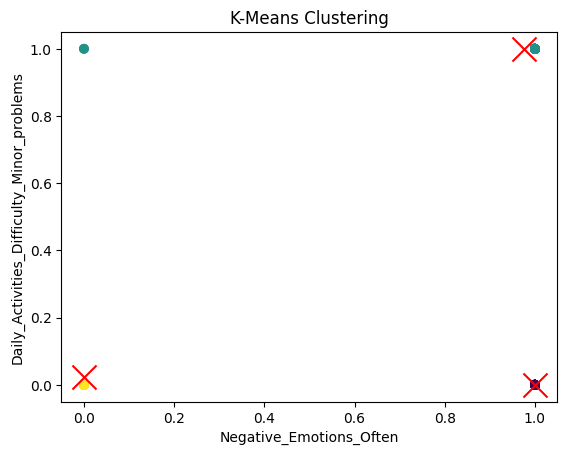

In [ ]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('K-Means Clustering')
plt.xlabel('Negative_Emotions_Often')
plt.ylabel('Daily_Activities_Difficulty_Minor_problems')
plt.show()


# Cross validation of the different models

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Load the dataset from a CSV file
file_path = '/Users/srujana_chintala/processed_new_survey_data_columns.csv'
df = pd.read_csv(file_path)

# Specify the columns for features (X) and target (y)
feature_columns = ['Health_Satisfaction', 'Negative_Emotions_Often', 'Emotional_Impact']
target_column = 'Daily_Activities_Difficulty_Minor_problems'

# Extract the features (X) and target (y) from the DataFrame
X = df[feature_columns].values
y = df[target_column].values.flatten()  # Flatten the target array

# Initialize the models
svm_model = SVC(kernel='linear')
knn_model = KNeighborsClassifier(n_neighbors=5)
logreg_model = LogisticRegression()
tree_model = DecisionTreeClassifier()

# Perform cross-validation for SVM
svm_scores = cross_val_score(svm_model, X, y, cv=5)
print(f"SVM Cross-Validation Scores: {svm_scores}")
print(f"SVM Mean Score: {svm_scores.mean()}")

# Perform cross-validation for KNN
knn_scores = cross_val_score(knn_model, X, y, cv=5)
print(f"KNN Cross-Validation Scores: {knn_scores}")
print(f"KNN Mean Score: {knn_scores.mean()}")

# Perform cross-validation for Logistic Regression
logreg_scores = cross_val_score(logreg_model, X, y, cv=5)
print(f"Logistic Regression Cross-Validation Scores: {logreg_scores}")
print(f"Logistic Regression Mean Score: {logreg_scores.mean()}")

# Perform cross-validation for Decision Tree
tree_scores = cross_val_score(tree_model, X, y, cv=5)
print(f"Decision Tree Cross-Validation Scores: {tree_scores}")
print(f"Decision Tree Mean Score: {tree_scores.mean()}")


SVM Cross-Validation Scores: [0.7        0.76666667 0.73333333 0.75       0.71666667]
SVM Mean Score: 0.7333333333333334
KNN Cross-Validation Scores: [0.71666667 0.76666667 0.73333333 0.61666667 0.6       ]
KNN Mean Score: 0.6866666666666668
Logistic Regression Cross-Validation Scores: [0.71666667 0.76666667 0.73333333 0.73333333 0.7       ]
Logistic Regression Mean Score: 0.7300000000000001
Decision Tree Cross-Validation Scores: [0.7        0.76666667 0.73333333 0.73333333 0.7       ]
Decision Tree Mean Score: 0.7266666666666668
